## Memuat dataset

### Subtask:
Memuat data dari file `train.csv` ke dalam DataFrame pandas.


**Alasan**:
Mengimpor pustaka pandas dan memuat file `train.csv` ke dalam DataFrame, lalu menampilkan beberapa baris pertama untuk memverifikasi data berhasil dimuat.



In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
display(df.head())

,id;year;hour;season;holiday;workingday;weather;temp;atemp;humidity;windspeed;count
0,3;2012;23;3;0;0;2;23.78;27.275;73;11.0014;133
1,4;2011;8;3;0;0;1;27.88;31.82;57;0;132
2,5;2012;2;1;0;1;1;20.5;24.24;59;0;19
3,7;2011;20;3;0;1;3;25.42;28.79;83;19.9995;58
4,8;2011;17;3;0;1;3;26.24;28.79;89;0;285


**Alasan**:
The data was not loaded correctly because the separator is a semicolon instead of a comma. Reload the data using the correct separator and display the first few rows.



In [2]:
df = pd.read_csv('train.csv', sep=';')
display(df.head())

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
1,4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2,5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
3,7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
4,8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285


## Eksplorasi data awal

### Subtask:
Melakukan pemeriksaan awal pada dataset untuk memahami struktur data, tipe data, dan keberadaan nilai yang hilang.


**Alasan**:
Melakukan pemeriksaan awal pada dataset untuk memahami struktur data, tipe data, dan keberadaan nilai yang hilang dengan menampilkan informasi dasar, statistik deskriptif, dan jumlah nilai yang hilang.



In [3]:
df.info()
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   int64  
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   int64  
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 721.0 KB


,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,5463.266224,2011.495513,11.565353,2.506178,0.029002,0.677331,1.410066,20.267085,23.696581,61.771492,12.802070,191.419430
std,3144.709810,0.500012,6.915777,1.115935,0.167824,0.467528,0.628004,7.824066,8.514199,19.302151,8.178889,182.140265
min,3.000000,2011.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2771.000000,2011.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,41.000000
50%,5477.000000,2011.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,8186.000000,2012.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,283.000000
max,10886.000000,2012.000000,23.000000,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,56.996900,977.000000


,0
id,0
year,0
hour,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0


## Pra-pemrosesan data

### Subtask:
Menangani nilai yang hilang jika ada, dan melakukan encoding pada variabel kategorikal jika diperlukan.


## Pemilihan fitur dan label

### Subtask:
Memilih variabel independen (X) dan variabel dependen (y) yang akan digunakan untuk pelatihan model.



Memilih kolom 'temp' dan 'windspeed' sebagai variabel independen (X) dan kolom 'count' sebagai variabel dependen (y) berdasarkan konteks dataset dan tujuan prediksi jumlah sewa sepeda.



In [4]:
X = df[['temp', 'windspeed']]
y = df['count']

print("Variabel independen (X):")
print(X.columns)
print("\nVariabel dependen (y):")
print(y.name)

Variabel independen (X):
Index(['temp', 'windspeed'], dtype='object')

Variabel dependen (y):
count


## Pembagian data

### Subtask:
Membagi dataset menjadi data latih dan data uji.



Impor fungsi train_test_split dan bagi dataset menjadi data latih dan data uji.



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran data uji (X_test, y_test):", X_test.shape, y_test.shape)

Ukuran data latih (X_train, y_train): (6151, 2) (6151,)
Ukuran data uji (X_test, y_test): (1538, 2) (1538,)


## Implementasi model supervised learning

### Subtask:
Mengimplementasikan Support Vector Classifier (atau model klasifikasi lain jika labelnya kategorikal) atau Linear Regression (atau model regresi lain jika labelnya numerik).



Memeriksa tipe data variabel dependen `y` untuk menentukan model supervised learning yang sesuai.



In [6]:
print(y.dtype)

int64



Karena tipe data variabel dependen `y` adalah numerik (`int64`), maka model regresi yang sesuai adalah `LinearRegression`. Mengimpor dan membuat instance dari `LinearRegression`.



In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("Model yang dipilih:", type(model).__name__)

Model yang dipilih: LinearRegression


## Pelatihan model

### Subtask:
Melatih model menggunakan data latih.



Latih model LinearRegression yang sudah diinisialisasi (model) menggunakan data latih X_train dan y_train dengan memanggil metode .fit().



In [8]:
model.fit(X_train, y_train)
print("Model berhasil dilatih.")

Model berhasil dilatih.


## Prediksi

### Subtask:
Melakukan prediksi pada data uji menggunakan model yang telah dilatih.



Menggunakan model Linear Regression yang telah dilatih untuk memprediksi nilai pada data uji dan menyimpan hasilnya dalam variabel y_pred. Kemudian, menampilkan beberapa nilai awal dari y_pred untuk verifikasi.



In [9]:
y_pred = model.predict(X_test)
display(y_pred[:10])

array([174.10845008, 156.66964359, 301.88457507, 164.24801715,
       179.2684771 , 206.85697869, 174.21066545,  51.67939891,
       206.85697869, 219.27204531])

## Evaluasi model

### Subtask:
Mengevaluasi hasil prediksi menggunakan metrik yang sesuai (Confusion Matrix & Classification Report untuk klasifikasi, atau MAE, MSE, RMSE, dan R2-Score untuk regresi).



Mengimport metrik evaluasi yang sesuai untuk regresi dari `sklearn.metrics` dan menghitung serta mencetak nilai MAE, MSE, RMSE, dan R2-Score.



In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2-Score: {r2}")

Mean Absolute Error (MAE): 124.76665025533568
Mean Squared Error (MSE): 26733.078745352283
Root Mean Squared Error (RMSE): 163.5025343698142
R2-Score: 0.19791431354545352


## Visualisasi hasil prediksi

### Subtask:
Membuat plot untuk memvisualisasikan hasil prediksi dan membandingkannya dengan nilai target asli.



Impor pustaka matplotlib.pyplot dan buat scatter plot untuk memvisualisasikan hasil prediksi versus nilai target asli, tambahkan label, judul, dan garis diagonal.



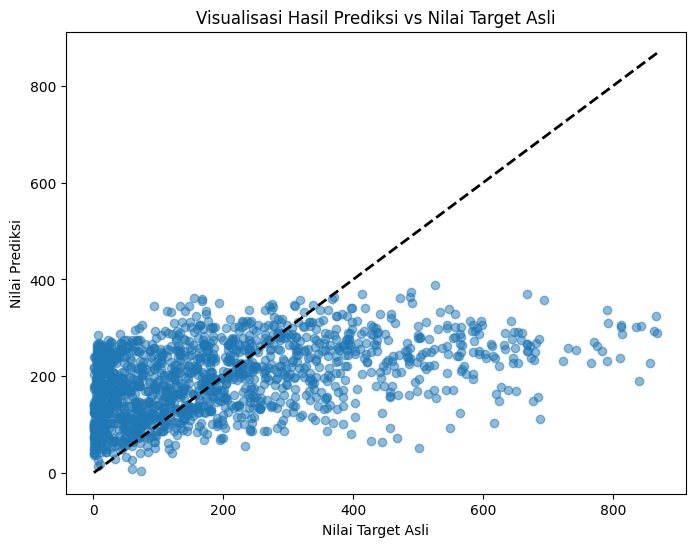

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Nilai Target Asli")
plt.ylabel("Nilai Prediksi")
plt.title("Visualisasi Hasil Prediksi vs Nilai Target Asli")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Penjelasan

### Subtask:
Menambahkan markdown untuk menjelaskan setiap langkah dan hasil yang diperoleh dalam bahasa Indonesia gaya mahasiswa.



Menambahkan markdown untuk menjelaskan setiap langkah dan hasil yang diperoleh dalam bahasa Indonesia gaya mahasiswa.

